# Feature Selection
## ASSOCIATION, CORRELATION AND CORRELATION RATIO OF FEATURES CLASSIFYING EDIBLE / POISONOUS MUSHROOMS AND CEREAL RATING

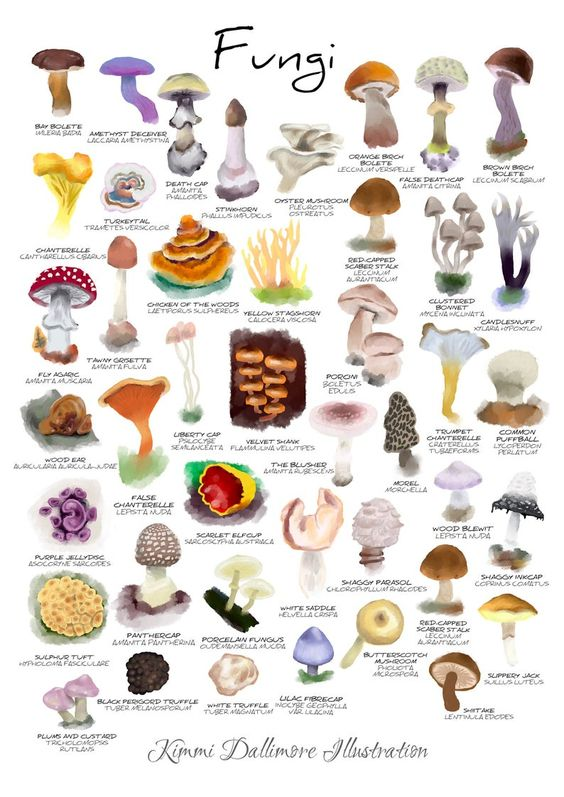

In [183]:
## Import picture for project illustration
from IPython import display
display.Image('https://i.pinimg.com/564x/b0/6a/f1/b06af1980f709698e33dc6453a01437e.jpg')

In [184]:
## Import Common Package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [185]:
## Import Dataset
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [186]:
## Check dataset info
df.info()
## Result: no missing value detected, all 23 columns are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [187]:
## Check unique value of column veil-type
df['veil-type'].nunique()
## Result: Since veil-type has only 1 value, therefore we drop because this column wont give adequate information

1

In [188]:
## Drop Veil-Type because its only contain 1 type of data
df.drop(columns=['veil-type'],inplace=True)

In [189]:
## Build For Loop to contain data for checking column details
mushroomsDesc=[]

for i in df.columns:
    mushroomsDesc.append([
        i,
        df[i].dtypes,
        df[i].isna().sum(),
        round((df[i].isna().sum() / len(df))*100, 2),
        df[i].nunique(),
        df[i].drop_duplicates().sample(2).values
        ])

In [190]:
## Input data into DataFrame and show details of every column
pd.DataFrame(data=mushroomsDesc,
            columns=[
                'Features',
                'DataType',
                'Null',
                'Null%',
                'Unique',
                'Sample'
            ])

,Features,DataType,Null,Null%,Unique,Sample
0,class,object,0,0.0,2,"[e, p]"
1,cap-shape,object,0,0.0,6,"[k, b]"
2,cap-surface,object,0,0.0,4,"[y, f]"
3,cap-color,object,0,0.0,10,"[y, u]"
4,bruises,object,0,0.0,2,"[f, t]"
5,odor,object,0,0.0,9,"[m, a]"
6,gill-attachment,object,0,0.0,2,"[a, f]"
7,gill-spacing,object,0,0.0,2,"[c, w]"
8,gill-size,object,0,0.0,2,"[b, n]"
9,gill-color,object,0,0.0,12,"[u, w]"


## Association

In [191]:
## Import Package
import scipy.stats as ss
from collections import Counter

### Cramer's V

In [192]:
## Build function to check association
def cramers(x,y):
    ## Confusion Matrix
    confusion_matrix=pd.crosstab(x,y)
    ## Chi-Square and Phi-Square
    chi2=ss.chi2_contingency(confusion_matrix)[0]
    n=confusion_matrix.sum().sum()
    phi2=chi2/n
    ## Extract shape of Confusion Matrix into Variables
    r,k=confusion_matrix.shape
    ## Phi-Square Correlation
    phi2corr=max(0,phi2-((k-1)*(r-1))/(n-1))
    ## Correlation of shape (features)
    rcorr=r-((r-1)**2)/(n-1)
    kcorr=k-((k-1)**2)/(n-1)
    ## Return Value of Function
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [193]:
## Calculate association score of mushroom class and veil-color
cramers(df['class'],df['veil-color'])

0.15222237917389744

`V(x|y) = V(y|x)`

In [194]:
## Calculate association score of mushroom class and veil-color
cramers(df['class'],df['odor'])

0.9705579576413808

In [195]:
## Prove that Association is symmetrical
cramers(df['odor'],df['class'])
## Result: proven symmetrical

0.9705579576413808

#### Association Score of Features to Target with Cramer's V

In [196]:
## Show all columns name
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [197]:
## Build For Loop for Assocation Score Presentation
assoc_cramers=[]

for i in df.columns:
    assoc = round(cramers(df['class'],df[i]),2)
    assoc_cramers.append(assoc)

In [198]:
## Convert to DataFrame and store as variable
df_cramers=pd.DataFrame(data=[assoc_cramers], columns=df.columns, index=['Class'])
## Show DataFrame
df_cramers

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Class,1.0,0.24,0.2,0.22,0.5,0.97,0.13,0.35,0.54,0.68,...,0.59,0.57,0.52,0.51,0.15,0.21,0.6,0.75,0.49,0.44


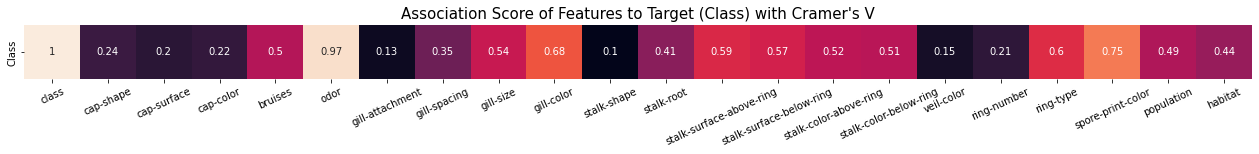

In [199]:
## Visualize with Heatmap
plt.figure(figsize=(22,1))
sns.heatmap(df_cramers, annot=True, cbar=False)
plt.title("Association Score of Features to Target (Class) with Cramer's V", size=15)
plt.xticks(rotation=25)
plt.show()

### Theil's U

In [200]:
## Import Package
import math

In [201]:
## Build Function to calculate Conditional Entropy
def conditional_entropy(x,y):
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurences = sum(y_counter.values())
    entropy=0

    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurences
        p_y = y_counter[xy[1]] / total_occurences
        entropy += p_xy * math.log(p_y / p_xy)

    return entropy

In [202]:
## Build Function to Calculation Association Score
def theils(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurences, x_counter.values()))
    s_x = ss.entropy(p_x)

    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x

`T(x|y) != T(y|x)`

In [203]:
## Calculate Association Score of Mushroom Class and Odor
theils(df['class'],df['odor'])
## Intepretation: Edible and non-edible mushrooms almost could be always defined by its odor/smell

0.906920320651308

In [204]:
## Prove that Theils U is asymmetrical
theils(df['odor'],df['class'])
## Result: proven asymmetrical
## Intepretation: Odor/smell of a mushroom alone could not define either the mushroom is edible or poisonous

0.3906481565033008

#### Association Score of Features to Target with Theil's U

In [205]:
## Build For Loop for Assocation Score Presentation
assoc_theils = []

for i in df.columns:
    assoc = round(theils(df['class'], df[i]), 2)
    assoc_theils.append(assoc)

In [206]:
## Convert to DataFrame and store as variable
df_theils=pd.DataFrame(data=[assoc_theils], columns=df.columns, index=['Class'])
## Show DataFrame
df_theils

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
Class,1.0,0.05,0.03,0.04,0.19,0.91,0.01,0.1,0.23,0.42,...,0.28,0.27,0.25,0.24,0.02,0.04,0.32,0.48,0.2,0.16


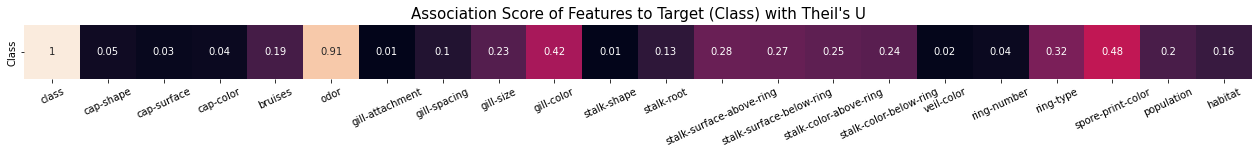

In [207]:
## Visualize with Heatmap
plt.figure(figsize=(22,1))
sns.heatmap(df_theils, annot=True, cbar=False)
plt.title("Association Score of Features to Target (Class) with Theil's U", size=15)
plt.xticks(rotation=25)
plt.show()

<hr>

## Correlation and Correlation Ratio

In [208]:
## Re-Import Dataset
df_2 = pd.read_csv('cereal.csv')
## Show Data
df_2.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,FDA_25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,FDA_0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,FDA_25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,FDA_25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,FDA_25,3,1.0,0.75,34.384843


In [209]:
## Check Dataset Info
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     76 non-null     float64
 9   sugars    76 non-null     float64
 10  potass    75 non-null     float64
 11  vitamins  77 non-null     object 
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(7), int64(5), object(4)
memory usage: 9.8+ KB


### Correlation

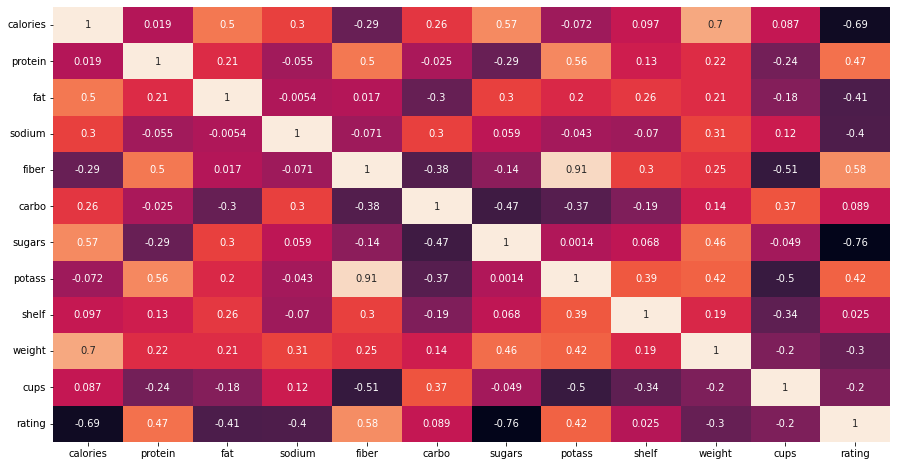

In [210]:
## Show Heatmap of Numeric x Numeric Columns
plt.figure(figsize=(15,8))
sns.heatmap(df_2.corr(), annot=True, cbar=False)
plt.show()

### Correlation Ratio Numeric x Numeric

In [211]:
## Build Function to Calculate Correlation Ratio of Numeric x Numeric Columns
def corr_ratio(categories, measurement):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat) + 1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)

    for i in range(0, cat_num):
        cat_measure = measurement[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measure)
        y_avg_array[i] = np.average(cat_measure)

    y_total_avg = np.sum(np.multiply(y_avg_array, n_array)) / np.sum(n_array)

    numerator = np.sum(np.multiply(n_array, np.power(np.subtract(y_avg_array, y_total_avg), 2)))
    denominator = np.sum(np.power(np.subtract(measurement, y_total_avg), 2))

    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    
    return eta

In [212]:
## Calculate Correlation Ratio of Manufactures to Rating
corr_ratio(df_2['mfr'], df_2['rating'])
## Medium Correlation

0.6069216466393043

In [213]:
## Calculate Correlation Ratio of Cereal Type to Rating
corr_ratio(df_2['type'], df_2['rating'])
## Low/Weak Correlation

0.2030237074215607

#### Correlation Ratio Categorical x Numeric

In [214]:
## Determine categorical columns
col = df_2.columns[df_2.dtypes == 'object']
col

Index(['name', 'mfr', 'type', 'vitamins'], dtype='object')

In [215]:
## Build For Loop for Correlation Ratio Presentation
cor_ratio=[]

for i in col:
    corr = round(corr_ratio(df_2[i], df_2['rating']), 2)
    cor_ratio.append(corr)

In [216]:
## Convert to DataFrame and store as variable
df_corr_ratio=pd.DataFrame(data=[cor_ratio], columns=col, index=['Rating'])
## Show DataFrame
df_corr_ratio

,name,mfr,type,vitamins
Rating,1.0,0.61,0.2,0.45


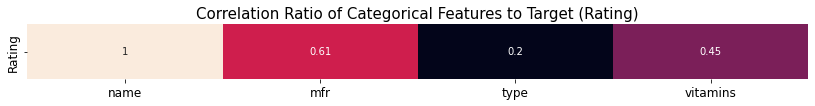

In [221]:
## Visualize with Heatmap
plt.figure(figsize=(14,1))
sns.heatmap(df_corr_ratio, annot=True, cbar=False)
plt.title("Correlation Ratio of Categorical Features to Target (Rating)", size=15)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

## Dython

In [232]:
## Import Package
import dython as dy
from dython.nominal import associations, cramers_v, theils_u, correlation_ratio

### Cramer's V

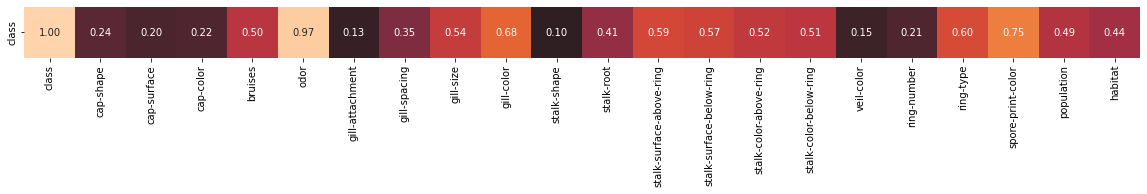

{'corr':        class  cap-shape  cap-surface  cap-color   bruises      odor  \
 class    1.0    0.24433     0.195997   0.215889  0.501188  0.970558   
 
        gill-attachment  gill-spacing  gill-size  gill-color  ...  \
 class         0.127951      0.347897   0.539677    0.679877  ...   
 
        stalk-surface-above-ring  stalk-surface-below-ring  \
 class                  0.587666                  0.574551   
 
        stalk-color-above-ring  stalk-color-below-ring  veil-color  \
 class                0.523943                0.513799    0.152222   
 
        ring-number  ring-type  spore-print-color  population   habitat  
 class     0.214212     0.6029           0.752036    0.486775  0.439323  
 
 [1 rows x 22 columns],
 'ax': <AxesSubplot:>}

In [277]:
## Association Score Heatmap Using Dython
associations(df, figsize=(20,10), cbar=False, display_rows=['class'])

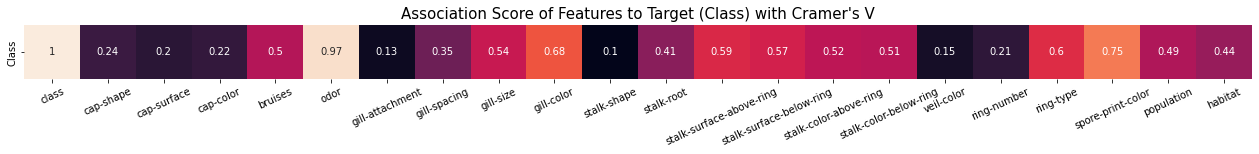

In [241]:
# Show only Association of Features to Target
## Build For Loop
assoc_cramers_2 = []

for i in df.columns:
    assoc = round(cramers_v(df['class'],df[i]),2) ## use cramers_v from dython instead of building function from scratch
    assoc_cramers_2.append(assoc)

## Convert to DataFrame and store as variable
df_cramers_2=pd.DataFrame(data=[assoc_cramers_2], columns=df.columns, index=['Class'])

## Visualize with Heatmap
plt.figure(figsize=(22,1))
sns.heatmap(df_cramers_2, annot=True, cbar=False)
plt.title("Association Score of Features to Target (Class) with Cramer's V", size=15)
plt.xticks(rotation=25)
plt.show()

## Notes: Dython is more efficient

### Theil's U

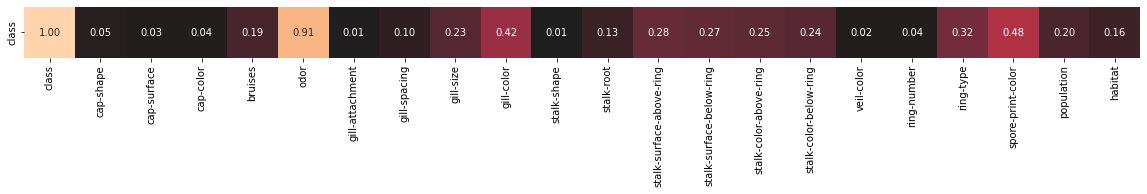

{'corr':        class  cap-shape  cap-surface  cap-color   bruises     odor  \
 class    1.0   0.048842     0.028617   0.036083  0.192559  0.90692   
 
        gill-attachment  gill-spacing  gill-size  gill-color  ...  \
 class         0.014178      0.100977   0.230369    0.417367  ...   
 
        stalk-surface-above-ring  stalk-surface-below-ring  \
 class                  0.284991                  0.272148   
 
        stalk-color-above-ring  stalk-color-below-ring  veil-color  \
 class                0.254082                0.241641    0.023839   
 
        ring-number  ring-type  spore-print-color  population  habitat  
 class     0.038489   0.318318           0.481153    0.202146  0.15698  
 
 [1 rows x 22 columns],
 'ax': <AxesSubplot:>}

In [275]:
## Association Score Heatmap Using Dython
associations(df, figsize=(20,10), cbar=False, nom_nom_assoc='theil', display_rows=['class'])

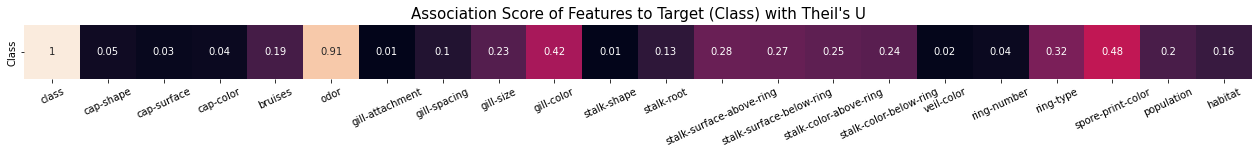

In [242]:
# Show only Association of Features to Target
## Build For Loop
assoc_theils_2 = []

for i in df.columns:
    assoc = round(theils_u(df['class'],df[i]),2) ## use theils_u from dython instead of building function from scratch
    assoc_theils_2.append(assoc)

## Convert to DataFrame and store as variable
df_theils_2=pd.DataFrame(data=[assoc_theils_2], columns=df.columns, index=['Class'])

## Visualize with Heatmap
plt.figure(figsize=(22,1))
sns.heatmap(df_theils_2, annot=True, cbar=False)
plt.title("Association Score of Features to Target (Class) with Theil's U", size=15)
plt.xticks(rotation=25)
plt.show()

## Notes: Dython is more efficient

### Correlation Ratio

In [281]:
## Determine categorical columns
col = df_2.columns[df_2.dtypes == 'object']
col

Index(['name', 'mfr', 'type', 'vitamins'], dtype='object')

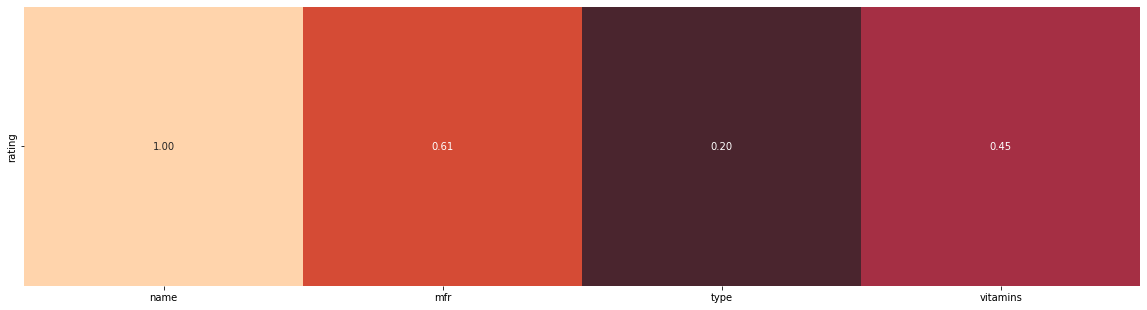

{'corr':         name       mfr      type  vitamins
 rating   1.0  0.606922  0.203024  0.452095,
 'ax': <AxesSubplot:>}

In [284]:
## Association Score Heatmap Using Dython
associations(df_2, figsize=(20,10), cbar=False, display_rows=['rating'], display_columns=['name', 'mfr', 'type', 'vitamins'])

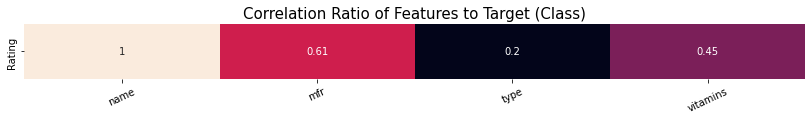

In [253]:
# Show only Association of Features to Target
## Build For Loop
cor_ratio_2 = []

for i in col:
    assoc = round(correlation_ratio(df_2[i],df_2['rating']),2) ## use correlation_ratio from dython instead of building function from scratch
    cor_ratio_2.append(assoc)

## Convert to DataFrame and store as variable
df_corr_ratio_2=pd.DataFrame(data=[cor_ratio_2], columns=col, index=['Rating'])

## Visualize with Heatmap
plt.figure(figsize=(14,1))
sns.heatmap(df_corr_ratio_2, annot=True, cbar=False)
plt.title("Correlation Ratio of Features to Target (Class)", size=15)
plt.xticks(rotation=25)
plt.show()

## Notes: Dython could only show association heatmap between all features
### If we want to show only features to target, we could use this manual method without needed to build def function 